Filename: exposure_B.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (512, 512)   float32   
FITS Header Cards:
SIMPLE  =                    T / Written by IDL:  Thu Oct 12 16:28:37 2006      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                  512 /                                                
NAXIS2  =                  512 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2006-10-12'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
Data shape: (512, 512)
Data type: >f4


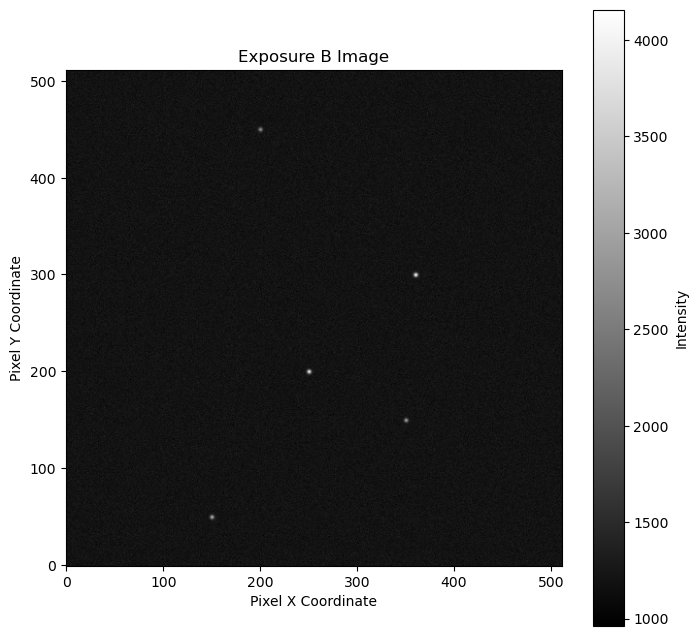

Filename: exposure_V.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (512, 512)   float32   
Data shape: (512, 512)
Data type: >f4


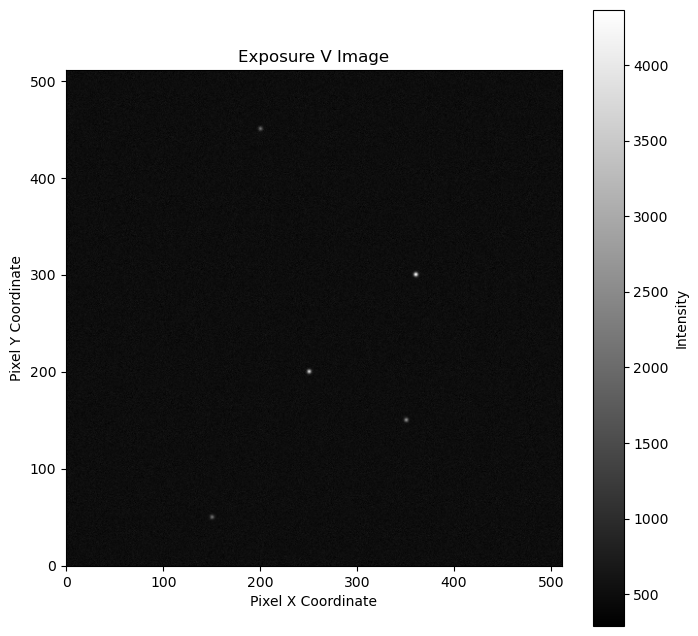

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits


# Open the FITS file
with fits.open("exposure_B.fits") as hdul:
    # Print information about the FITS file
    hdul.info()
    
    # Access the data from the first HDU
    B_data = hdul[0].data
    header = hdul[0].header
    
    # Print the header cards
    print("FITS Header Cards:")
    for card in header.cards:
        print(card)
    # Check the data shape and type
    print("Data shape:", B_data.shape)
    print("Data type:", B_data.dtype)

# Visualize the data
plt.figure(figsize=(8, 8))
plt.imshow(B_data, cmap='gray', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Exposure B Image')
plt.xlabel('Pixel X Coordinate')
plt.ylabel('Pixel Y Coordinate')
plt.savefig('Exposure_B.pdf')
plt.show()


# Open the FITS file
with fits.open("exposure_V.fits") as hdul:
    # Print information about the FITS file
    hdul.info()
    
    # Access the data from the first HDU
    V_data = hdul[0].data
    
    # Check the data shape and type
    print("Data shape:", V_data.shape)
    print("Data type:", V_data.dtype)

# Visualize the data
plt.figure(figsize=(8, 8))
plt.imshow(V_data, cmap='gray', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Exposure V Image')
plt.xlabel('Pixel X Coordinate')
plt.ylabel('Pixel Y Coordinate')
plt.savefig('Exposure_V.pdf')
plt.show()

In [2]:

import sp
# List all names defined in the module
all_names = dir(sp)

# Filter to get only callable functions
function_names = [name for name in all_names if callable(getattr(sp, name))]

print("Function names in sp.py:")
print(function_names )

hmin = 1000  # Minimum threshold for detection
fwhm = 3   # FWHM to be used for the convolution filter
results = sp.find(image=B_data, hmin=hmin, fwhm=fwhm)
# Print results

print("\n Identified stars B-Band:")
print('Amount of stars:', len(results[0]))
print("X coordinates:", results[0])
print("Y coordinates:", results[1])
print("Flux values:", results[2])
print("Sharpness values:", results[3])
print("Roundness values:", results[4])

aperture_radius = np.array([5])
skyrad = [6, 10]
flux_B , N_sky_B = sp.aper(image=B_data, xc=results[0], yc=results[1], apr=aperture_radius, skyrad=skyrad)
flux_B = flux_B.flatten()



results = sp.find(image=V_data, hmin=hmin, fwhm=fwhm)
print("\nIdentified stars V-band:")
print('Amount of stars:', len(results[0]))
print("X coordinates:", results[0])
print("Y coordinates:", results[1])
print("Flux values:", results[2])
print("Sharpness values:", results[3])
print("Roundness values:", results[4])


flux_V , N_sky_V = sp.aper(image=V_data, xc=results[0], yc=results[1], apr=aperture_radius, skyrad=skyrad)
flux_V = flux_V.flatten()




Function names in sp.py:
['Oneside', 'aper', 'arc', 'chord', 'find', 'intarea', 'meanclip', 'mmm', 'pixwt', 'regextract', 'saveFITS']

 Identified stars B-Band:
Amount of stars: 5
X coordinates: [150.00147683 349.99606642 249.99917808 359.99397826 200.00653572]
Y coordinates: [ 50.00004463 150.00254542 200.00615032 299.99493556 449.99112163]
Flux values: [1564.5468 1658.0742 2115.29   2265.6057 1167.367 ]
Sharpness values: [0.3567335  0.35045186 0.37784037 0.3462256  0.29734156]
Roundness values: [-0.07848927 -0.0589697   0.07076368  0.126086    0.24989598]
x, y in pixels, flux and sky in ADU
aperture radius is 5 pixels
x		 y		 flux 		sky
150.00147683182547 	 50.0000446323924 	 28433.12412583994 	 1199.398175790943
349.9960664160564 	 150.00254542007795 	 23581.57077209049 	 1205.1389858160974
249.99917807983684 	 200.00615032316298 	 39652.09516690401 	 1200.8499962861401
359.99397826127733 	 299.9949355645372 	 42270.59890785089 	 1202.2954930547457
200.00653571677293 	 449.991121625

In [3]:
gain = 5 # e- / ADU
RON = 250 # Read out noise in e-
B_magnitude_zeropoint = 16.43
V_magnitude_zeropoint = 17.40
flux_B = flux_B / 30
flux_V = flux_V / 10
B_magnitudes = -2.5*np.log10(flux_B) + B_magnitude_zeropoint 
V_magnitudes = -2.5*np.log10(flux_V ) + V_magnitude_zeropoint 
print('The B magnitudes are ', B_magnitudes)
print('The V magnitudes are ', V_magnitudes)


color_BV =  B_magnitudes - V_magnitudes
print('The B-V color are', color_BV)

The B magnitudes are  [8.98824168 9.19137131 8.62713779 8.55770713 9.28161178]
The V magnitudes are  [8.97226227 8.74006108 8.27097659 8.04916368 9.06885883]
The B-V color are [0.01597942 0.45131023 0.35616119 0.50854345 0.21275295]


In [4]:
k = np.pi * aperture_radius **2
delta_t = 30
N_source =  flux_B 
N_sky = N_sky_B
sigma_source = np.sqrt(gain * N_source)
sigma_sky = np.sqrt(gain * N_sky)
sigma_RN = RON

sigma_tot = np.sqrt(gain * N_source + k*(gain * N_sky + sigma_RN**2))


SN_ratios_B = (gain * N_source  * np.sqrt(delta_t)) / (sigma_tot)
print(f'The S/N ratio of B fluxes {SN_ratios_B}')


k = np.pi * aperture_radius **2
delta_t = 10
N_source =  flux_V
N_sky = N_sky_V
sigma_source = np.sqrt(gain * N_source)
sigma_sky = np.sqrt(gain * N_sky)
sigma_RN = RON

sigma_tot = np.sqrt(gain * N_source + k*(gain * N_sky + sigma_RN**2))


SN_ratios_V = (gain * N_source  * np.sqrt(delta_t)) / (sigma_tot)
print(f'The S/N ratio of V fluxes is {SN_ratios_V}')

The S/N ratio of B fluxes [11.1856719   9.27581174 15.59571385 16.62405815  8.53463448]
The S/N ratio of V fluxes is [16.42877942 20.33447363 31.31495576 38.38428999 15.02786938]


In [5]:
B_magnitudes_error = B_magnitudes / SN_ratios_B
V_magnitudes_error = V_magnitudes / SN_ratios_V


print(B_magnitudes_error)
print(V_magnitudes_error)


[0.80354956 0.99089671 0.55317364 0.51477846 1.08752306]
[0.54613079 0.42981497 0.26412225 0.20969943 0.60346937]


In [6]:
color_BV_error = np.sqrt(B_magnitudes_error**2 + V_magnitudes_error**2)

In [7]:
print(color_BV_error)

[0.97157127 1.08010055 0.612994   0.55585135 1.24373698]


DataFrame with types ending in 'V':
   type       B-V
53  O5V -0.202407
55  O7V -0.200058
56  O8V -0.195361
58  O9V -0.212434
8   B0V -0.211242
10  B1V -0.201695
11  B2V -0.189376
12  B3V -0.124844
14  B5V -0.105727
15  B6V -0.093491
16  B7V -0.084539
18  B8V -0.054230
19  B9V -0.027125
0   A0V  0.010239
1   A1V  0.010821
3   A2V  0.017663
4   A3V  0.036104
5   A5V  0.116673
6   A7V  0.096800
22  F2V  0.272156
23  F4V  0.219100
24  F5V  0.328404
25  F6V  0.315589
26  F7V  0.362027
28  F8V  0.383015
29  F9V  0.404096
31  G0V  0.412689
32  G1V  0.456847
34  G2V  0.447277
35  G5V  0.492636
37  G8V  0.562876
38  K0V  0.543982
39  K3V  0.684181
40  K4V  0.693579
41  K5V  0.868615
42  K7V  1.011866
43  K8V  0.754849
44  K9V  1.037977
45  M0V  1.058941
47  M1V  1.149093
48  M2V  1.176031
49  M4V  1.209478
50  M5V  1.158015
51  M6V  1.379054
52  M8V  1.058665


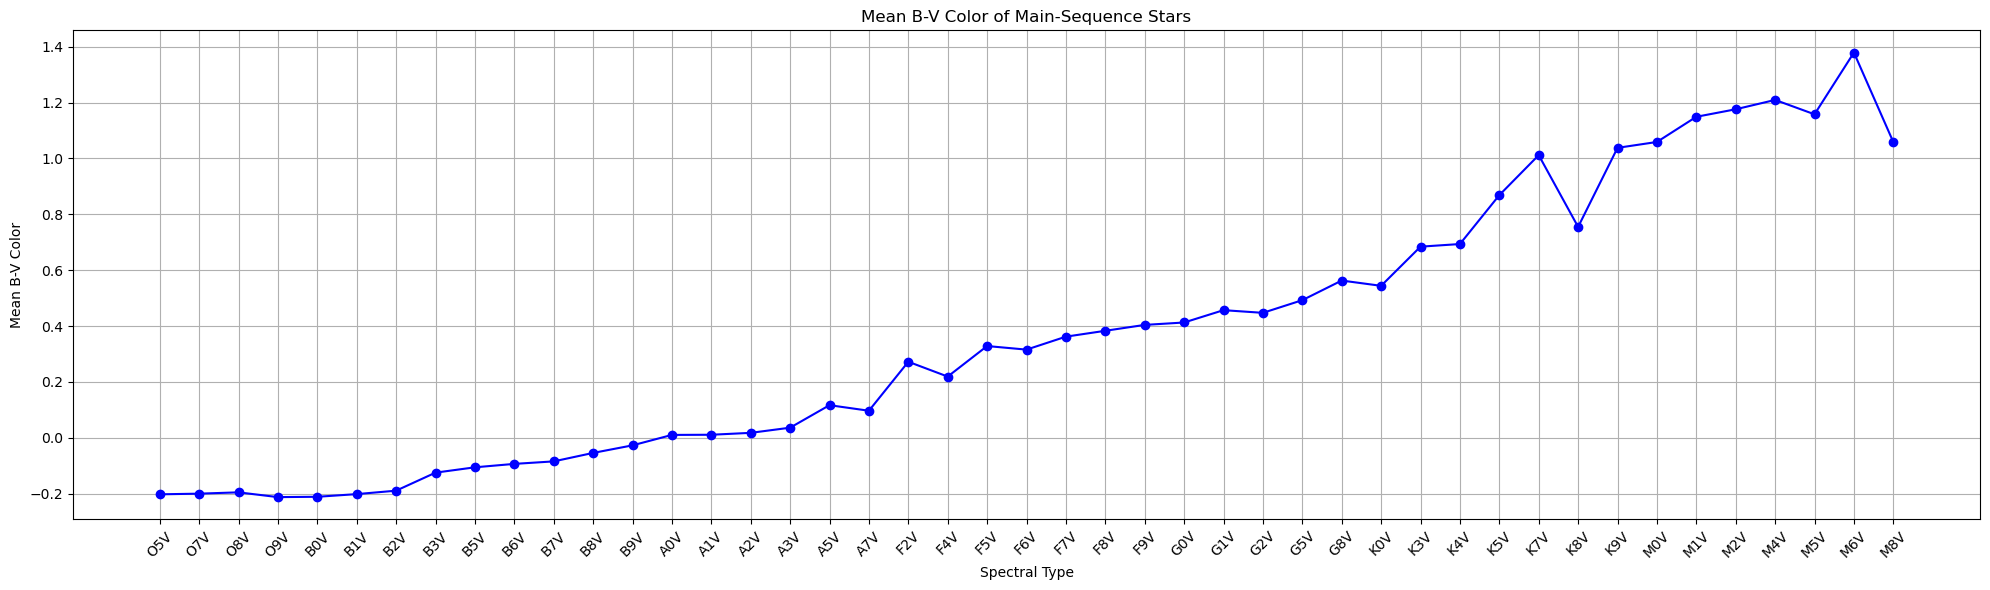

DataFrame with types ending in 'I':
   type       B-V
54  O7I -0.171459
57  O9I -0.172542
7   B0I -0.128103
9   B1I -0.092038
13  B5I -0.012111
17  B8I  0.034839
2   A2I  0.073029
20  F0I  0.180333
21  F2I  0.211504
27  F8I  0.384879
30  G0I  0.528272
33  G2I  0.630223
36  G8I  0.836511
46  M1I  1.453099


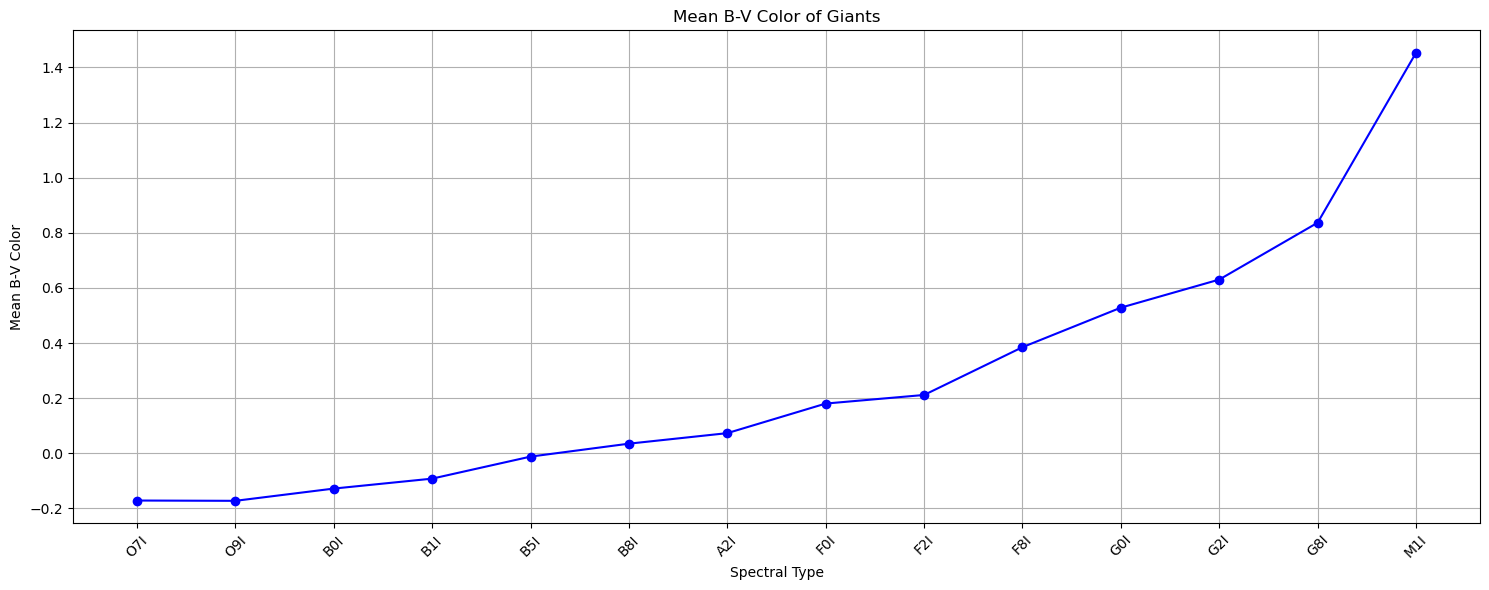

In [8]:
import pandas as pd
mean_bv = pd.read_csv('mean_bv.csv', index_col=0)  # 'index_col=0' to keep the 'type' as index

# Reset the index to move 'type' to a regular column
mean_bv = mean_bv.reset_index()
#print(mean_bv)

# Define the order of the types
type_order = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

# Create a mapping for sorting based on the first character of the type
mean_bv['type_order'] = mean_bv['type'].str[0].map({t: i for i, t in enumerate(type_order)})

# Split the DataFrame into two based on the last character of 'type'
df_V = mean_bv[mean_bv['type'].str.endswith('V')].copy()

# Create columns for sorting: one for the letter and one for the number
df_V['letter'] = df_V['type'].str[0]  # First character
df_V['number'] = df_V['type'].str[1:-1].astype(int)  # Numeric part as integer

# Sort the DataFrame based on the custom order
df_V.sort_values(by=['type_order', 'number'], inplace=True)

# Drop the auxiliary columns since they are no longer needed
df_V = df_V.drop(columns=['type_order', 'letter', 'number'])

# Display the sorted DataFrame
print("DataFrame with types ending in 'V':")
print(df_V)


# Plotting
plt.figure(figsize=(20, 6))
plt.plot(df_V['type'], df_V['B-V'], marker='o', linestyle='-', color='b')
plt.title('Mean B-V Color of Main-Sequence Stars')
plt.xlabel('Spectral Type')
plt.ylabel('Mean B-V Color')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Split the DataFrame into two based on the last character of 'type'
df_I = mean_bv[mean_bv['type'].str.endswith('I')].copy()

# Create columns for sorting: one for the letter and one for the number
df_I['letter'] = df_I['type'].str[0]  # First character
df_I['number'] = df_I['type'].str[1:-1].astype(int)  # Numeric part as integer

# Sort the DataFrame based on the custom order
df_I.sort_values(by=['type_order', 'number'], inplace=True)

# Drop the auxiliary columns since they are no longer needed
df_I = df_I.drop(columns=['type_order', 'letter', 'number'])

# Display the sorted DataFrame
print("DataFrame with types ending in 'I':")
print(df_I)


# Plotting
plt.figure(figsize=(15, 6))
plt.plot(df_I['type'], df_I['B-V'], marker='o', linestyle='-', color='b')
plt.title('Mean B-V Color of Giants')
plt.xlabel('Spectral Type')
plt.ylabel('Mean B-V Color')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [9]:
# Access the B-V value for type A0
a0_bv = df_V.loc[df_V['type'] == 'A0V', 'B-V']

# Output the result
if not a0_bv.empty:
    print(f"B-V value for type A0V: {a0_bv.values[0]}")
else:
    print("Type A0V not found in the DataFrame.")

B-V value for type A0V: 0.0102387362567892


In [10]:

# Function to find the closest type for each B-V value
def find_closest_type(bv_value, mean_bv):
    return (mean_bv['B-V'] - bv_value).abs().idxmin()

# Apply the function to each B-V value in color_BV
matches = [find_closest_type(bv, mean_bv) for bv in color_BV]

# Display results
for bv, match in zip(color_BV, matches):
    print(f"B-V: {bv} -> Closest star type: {match}")


# Convert the DataFrame to LaTeX table format
latex_table = mean_bv.to_latex(index=False)

# Save it to a .tex file
with open('latex\mean_bv_table.tex', 'w') as f:
    f.write(latex_table)
    
print(latex_table)

B-V: 0.01597941770652689 -> Closest star type: 3
B-V: 0.45131023361633105 -> Closest star type: 34
B-V: 0.35616119348708253 -> Closest star type: 26
B-V: 0.508543451306652 -> Closest star type: 35
B-V: 0.2127529492452389 -> Closest star type: 21
\begin{tabular}{lrr}
\toprule
type &       B-V &  type\_order \\
\midrule
 A0V &  0.010239 &           2 \\
 A1V &  0.010821 &           2 \\
 A2I &  0.073029 &           2 \\
 A2V &  0.017663 &           2 \\
 A3V &  0.036104 &           2 \\
 A5V &  0.116673 &           2 \\
 A7V &  0.096800 &           2 \\
 B0I & -0.128103 &           1 \\
 B0V & -0.211242 &           1 \\
 B1I & -0.092038 &           1 \\
 B1V & -0.201695 &           1 \\
 B2V & -0.189376 &           1 \\
 B3V & -0.124844 &           1 \\
 B5I & -0.012111 &           1 \\
 B5V & -0.105727 &           1 \\
 B6V & -0.093491 &           1 \\
 B7V & -0.084539 &           1 \\
 B8I &  0.034839 &           1 \\
 B8V & -0.054230 &           1 \\
 B9V & -0.027125 &           1 \\


C:\Users\Damianko\AppData\Local\Temp\ipykernel_21676\3921750335.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = mean_bv.to_latex(index=False)


In [11]:
M = 0.58
m = 9

distance = 10**((m-M +5)/5)
print(distance)

483.05880203977284
